In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [8]:
df = pd.read_csv("C:/Users/User/Desktop/2024/2024 여름방학/AI_STUDY/2주차(07.10~07.17)/iris.data",header=None)
df.columns = ['sepal length','sepal width','petal length','petal width','class']
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
# 컬렴명 확인
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

Text(0.5, 1.0, 'Label')

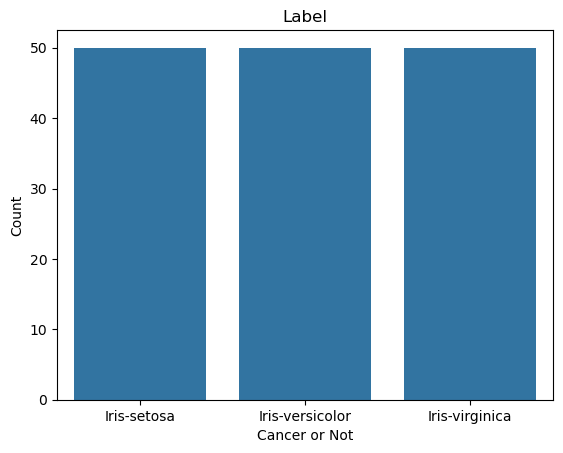

In [11]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="class")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

In [12]:
# 레이블 갯수 확인 (숫자)
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
# 결측치 확인
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [14]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_12636\1167874326.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal length'], kde = True, hist = False, ax=ax1)
C:\Users\User\AppData\Local\Temp\ipykernel_12636\1167874326.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sepal

<Axes: xlabel='sepal width', ylabel='Density'>

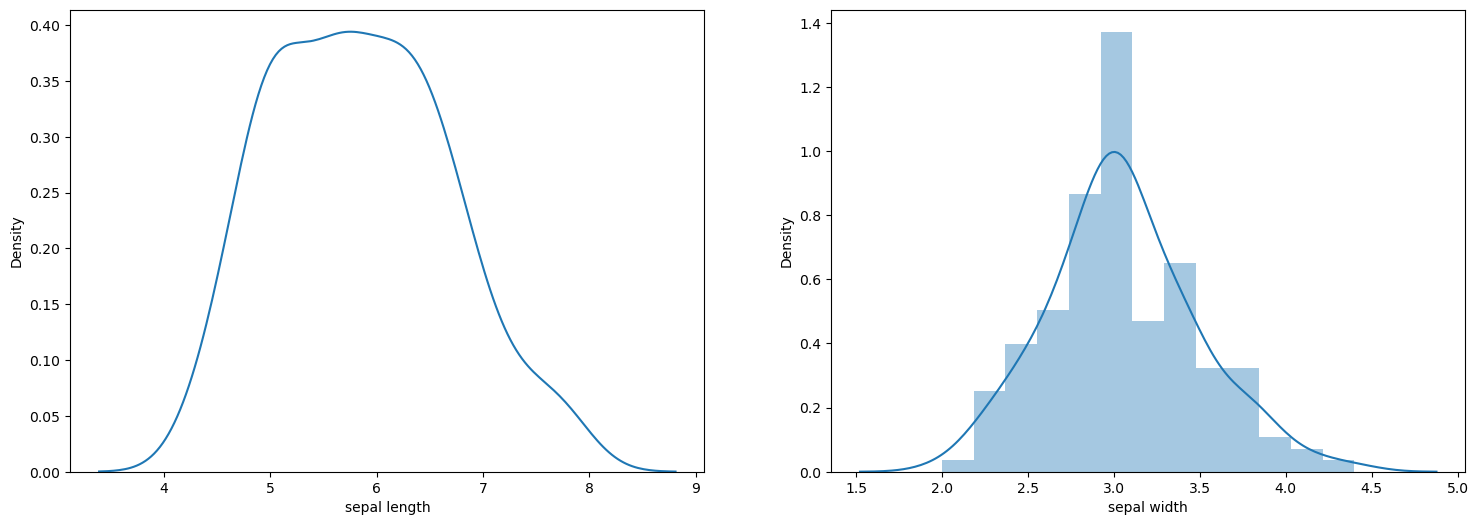

In [16]:
# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['sepal length'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['sepal width'], ax=ax2)

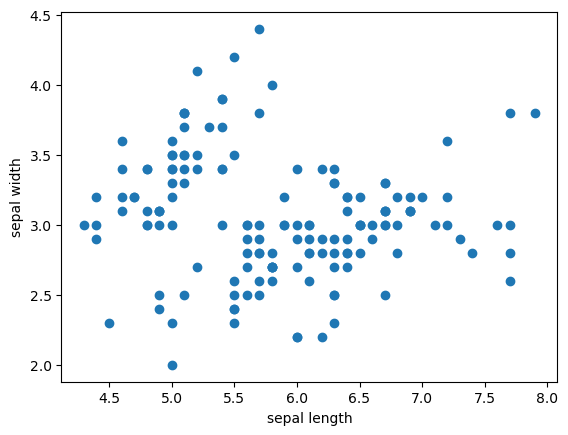

In [17]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['sepal length'], df['sepal width'])
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.show()

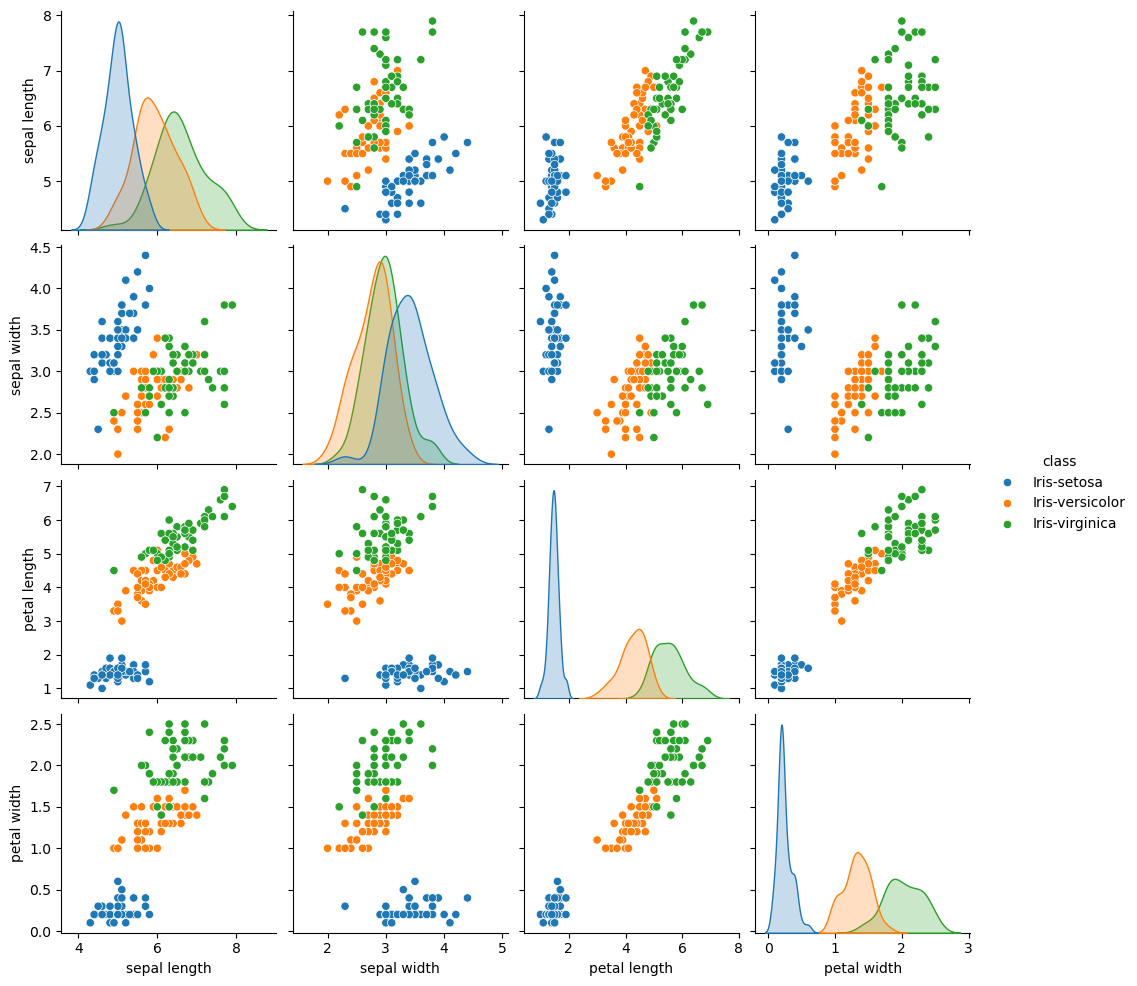

In [18]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['sepal length', 'sepal width', 'petal length', 'petal width'],
            hue ='class')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12636\3016991016.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="sepal length", data=df, palette="Set3")


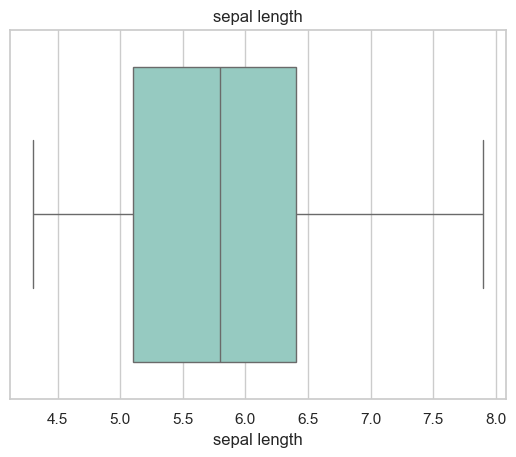

In [19]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="sepal length", data=df, palette="Set3")
plt.title("sepal length")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12636\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


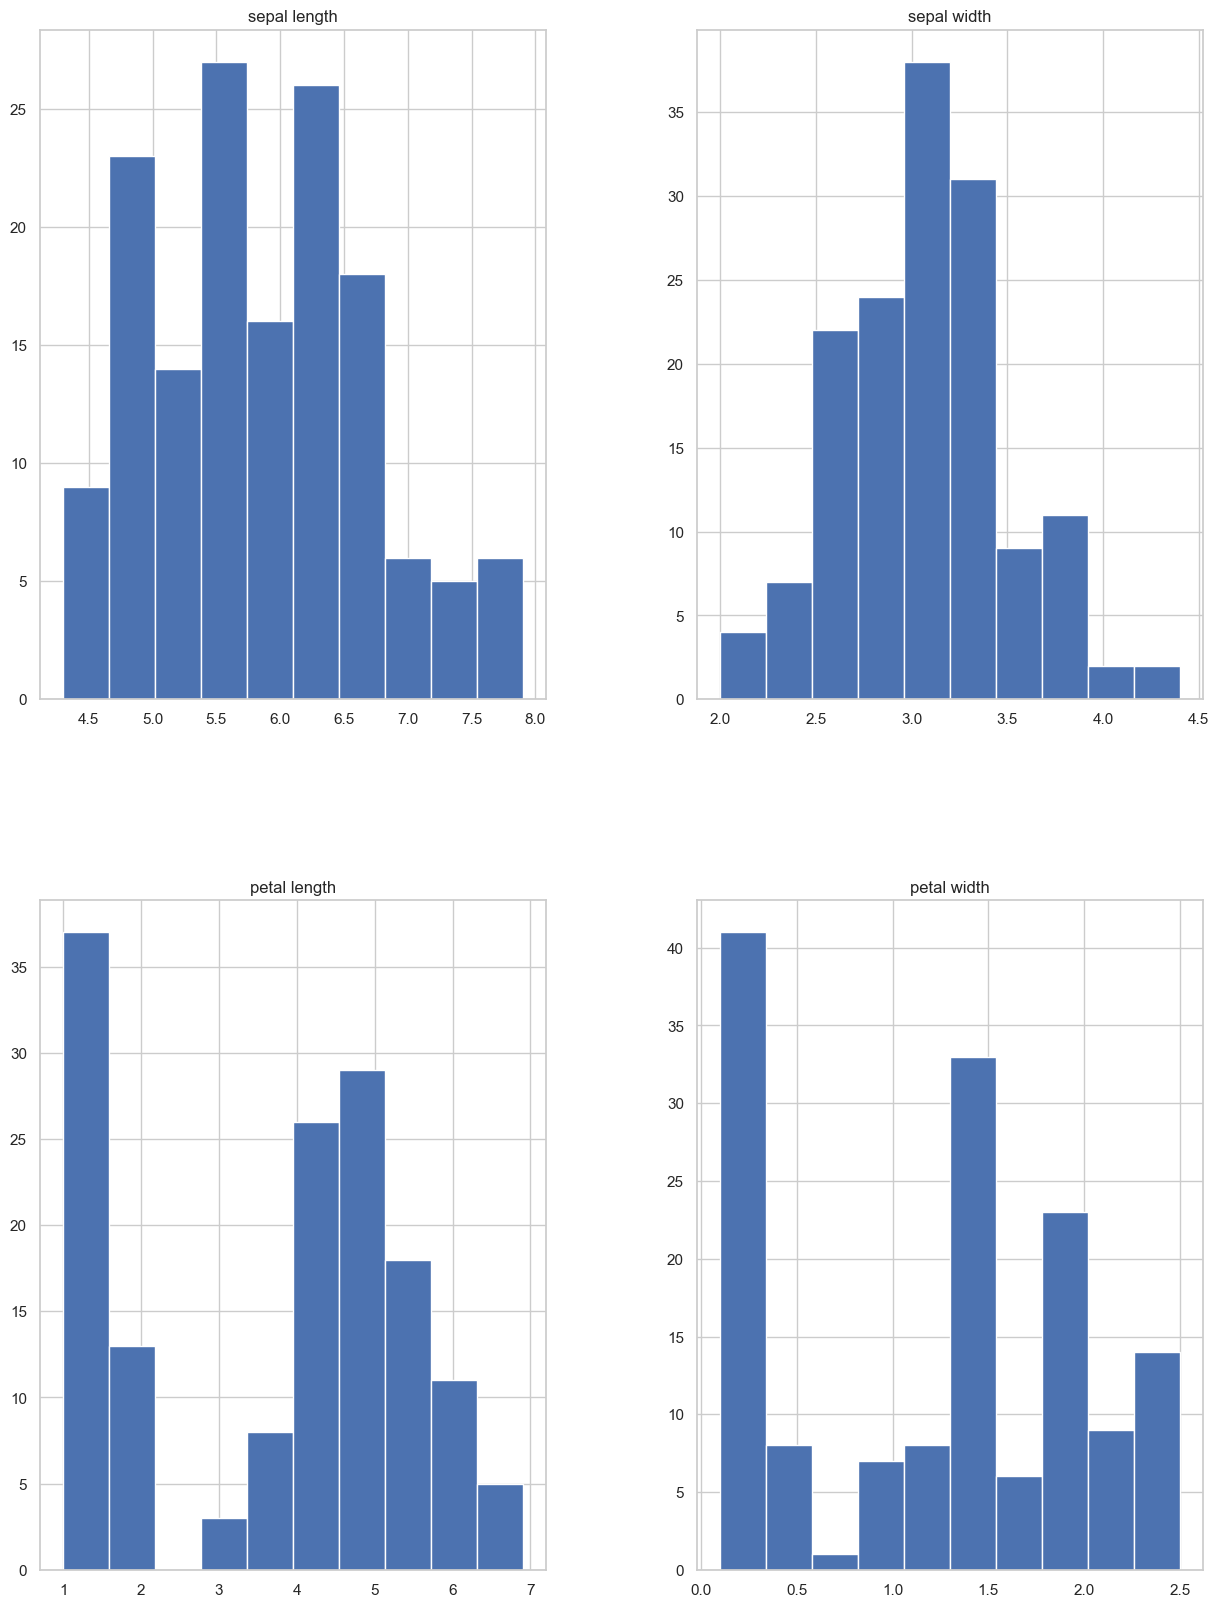

In [20]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [30]:
X=df.drop('class',axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
y=df['class']
y.value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [32]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

원-핫 인코딩

In [33]:
Y = pd.get_dummies(y).values

딥러닝 입력을 위해 Numpy로 변환

In [34]:
X = X.values

In [35]:
X
y
Y

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25,random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112, 3) (38, 3)


In [38]:
# 입력 데이터 형식 확인
print(f"Original X_train shape: {X_train.shape}")
print(f"Original X_test shape: {X_test.shape}")

# 입력 데이터 형식 변경
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(f"Reshaped X_train shape: {X_train.shape}")
print(f"Reshaped X_test shape: {X_test.shape}")

Original X_train shape: (112, 4)
Original X_test shape: (38, 4)
Reshaped X_train shape: (112, 1, 4)
Reshaped X_test shape: (38, 1, 4)


In [39]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [40]:
import tensorflow as tf

n_features = 4
n_timesteps = 1

input_layer = Input(shape=(n_timesteps,n_features))

conv1 = Conv1D(filters=64, kernel_size=1, activation='relu')(input_layer) 
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(3, activation = "sigmoid")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 4)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 64)               │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping() 그냥 하니까 epoch를 2번만 돌려서 매개변수 추가
early_stopping = EarlyStopping(patience=5)


model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test), callbacks = [early_stopping])
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.3582 - loss: 0.6708 - val_accuracy: 0.3684 - val_loss: 0.5684
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4321 - loss: 0.5689 - val_accuracy: 0.6842 - val_loss: 0.5388
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8000 - loss: 0.5199 - val_accuracy: 0.5789 - val_loss: 0.5408
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6963 - loss: 0.5041 - val_accuracy: 0.5789 - val_loss: 0.5424
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6734 - loss: 0.5002 - val_accuracy: 0.5789 - val_loss: 0.5240
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6921 - loss: 0.4792 - val_accuracy: 0.5789 - val_loss: 0.4970
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6869 - loss: 0.4536 - val_accuracy: 0.5789 - val_loss: 0.4716
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6942 - loss: 0.4369 - val_accuracy: 0.5789 - val_loss: 0.4532


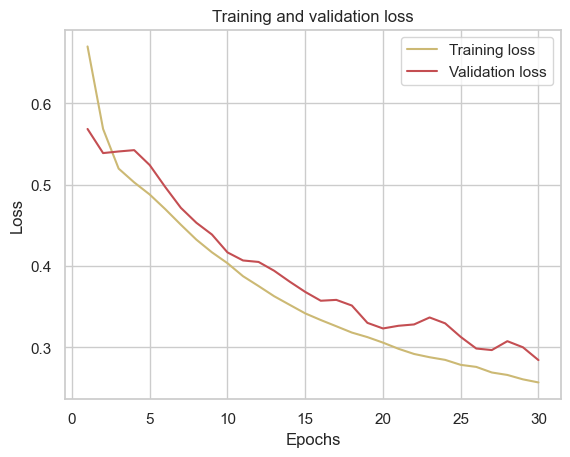

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.56      0.72        16
           2       0.56      1.00      0.72         9

    accuracy                           0.82        38
   macro avg       0.85      0.85      0.81        38
weighted avg       0.90      0.82      0.82        38

[[13  0  0]
 [ 0  9  7]
 [ 0  0  9]]


## split.sequence으로 순환데이터 만들기

In [44]:
import numpy as np

def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:i + seq_length]
        sequences.append(seq)
    return np.array(sequences)

# 예제 사용법:
# 'data'는 순차적인 데이터로, 리스트나 numpy 배열 형태로 가정합니다.
data = df

# 원하는 시퀀스 길이를 지정합니다.
seq_length = 3

# 시퀀스 생성
sequences = create_sequences(data, seq_length)

print("원본 데이터:")
print(data)
print("\n길이가", seq_length, "인 시퀀스:")
print(sequences)

원본 데이터:
     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

길이가 3 인 시퀀스:
[[[5.1 3.5 1.4 0.2 'Iris-setosa']
  [4.9 3.0 1.4 0.2 'Iris-setosa'